In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/MyDrive


In [2]:
%cd drive/MyDrive/maritime_challenge/

/content/MyDrive/MyDrive/maritime_challenge


In [3]:
import os
from pathlib import Path
from IPython.display import Image

HOME = os.getcwd()
print(HOME)

/content/MyDrive/MyDrive/maritime_challenge


## Install YOLOv10

In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 70.3 MB/s eta 0:00:00


In [5]:
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 2.6 MB/s eta 0:00:00


**NOTE:** YOLOv10 provides weight files pre-trained on the COCO dataset in various sizes.

In [13]:
Path("models").mkdir(parents=True, exist_ok=True)
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
# !ls -lh {HOME}/weights

In [10]:
data_path = "datasets/boat-types-detection.v3"
model_path = "models"

**NOTE:**
Make sure the last 4 lines of the data.yaml file have the following format:

```
test: ../test/images
train: ../train/images
val: ../valid/images
```

## Run Training

In [11]:
from ultralytics import YOLOv10

model = YOLOv10(f'{model_path}/yolov10m.pt')
NUM_EPOCHS = 250
run_name = f"yolov10-M-{NUM_EPOCHS}ep-1"

In [13]:
results = model.train(data=f'{HOME}/{data_path}/data.yaml', epochs=NUM_EPOCHS, imgsz=640, name=run_name, patience=6, batch=16, save=True)

New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=models/yolov10m.pt, data=/content/MyDrive/MyDrive/maritime_challenge/datasets/boat-types-detection.v3/data.yaml, epochs=250, time=None, patience=6, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=yolov10-M-250ep-1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment

100%|██████████| 755k/755k [00:00<00:00, 95.2MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytic

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/MyDrive/MyDrive/maritime_challenge/datasets/boat-types-detection.v3/train/labels... 1239 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1239/1239 [00:19<00:00, 63.75it/s] 


train: New cache created: /content/MyDrive/MyDrive/maritime_challenge/datasets/boat-types-detection.v3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/MyDrive/MyDrive/maritime_challenge/datasets/boat-types-detection.v3/valid/labels... 267 images, 1 backgrounds, 0 corrupt: 100%|██████████| 267/267 [00:04<00:00, 61.17it/s] 


val: New cache created: /content/MyDrive/MyDrive/maritime_challenge/datasets/boat-types-detection.v3/valid/labels.cache
Plotting labels to runs/detect/yolov10-M-250ep-1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov10-M-250ep-1
Starting training for 250 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      1/250      9.87G      1.539      2.475      1.495      1.715      4.331      1.396         51        640: 100%|██████████| 78/78 [01:07<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.20s/it]

                   all        267       1041       0.44      0.203      0.184     0.0987



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      2/250      9.85G      1.583       2.07      1.542      1.795      2.777       1.46         33        640: 100%|██████████| 78/78 [01:04<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.18it/s]

                   all        267       1041      0.355       0.18      0.119     0.0582



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      3/250      9.81G      1.712      2.177      1.658      1.925      2.684       1.57         61        640: 100%|██████████| 78/78 [01:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.25it/s]

                   all        267       1041      0.368      0.208      0.149     0.0716



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      4/250      9.86G      1.775      2.139      1.672      1.999      2.642      1.555         66        640: 100%|██████████| 78/78 [01:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]


                   all        267       1041      0.299      0.218      0.167      0.082

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      5/250      9.51G      1.701      2.023      1.644      1.906      2.463      1.541         47        640: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.25it/s]

                   all        267       1041      0.351      0.271      0.213      0.116



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      6/250      9.87G      1.673      1.954      1.601      1.898      2.362      1.512         82        640: 100%|██████████| 78/78 [01:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.16it/s]

                   all        267       1041      0.205      0.295      0.202       0.11



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      7/250      9.82G      1.643      1.926      1.587      1.907      2.381      1.505         64        640: 100%|██████████| 78/78 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]

                   all        267       1041      0.445      0.221      0.174     0.0847



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      8/250      9.82G      1.626      1.856      1.565      1.868        2.3      1.478         34        640: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.06s/it]

                   all        267       1041      0.439      0.242      0.211      0.113



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      9/250      9.77G      1.584      1.811      1.536       1.84      2.241      1.471         76        640: 100%|██████████| 78/78 [01:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.16it/s]

                   all        267       1041      0.563      0.256      0.241      0.136



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     10/250      9.86G      1.601      1.782      1.524      1.845      2.189      1.462         52        640: 100%|██████████| 78/78 [01:04<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.21it/s]


                   all        267       1041      0.377      0.278      0.253      0.138

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     11/250      9.87G      1.521       1.67      1.505       1.75      2.064      1.447         25        640: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.21it/s]

                   all        267       1041      0.522      0.223      0.233       0.13



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     12/250      9.32G      1.541      1.646      1.481      1.785       2.05      1.429         42        640: 100%|██████████| 78/78 [01:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]

                   all        267       1041      0.464      0.346      0.323       0.18



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     13/250      9.77G      1.489      1.595      1.459      1.768      1.985      1.408         56        640: 100%|██████████| 78/78 [01:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


                   all        267       1041      0.356      0.316      0.281      0.167

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     14/250      9.91G      1.515      1.591      1.466      1.771      1.952      1.415         21        640: 100%|██████████| 78/78 [01:01<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.27it/s]

                   all        267       1041      0.366      0.365      0.291      0.171



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     15/250      9.84G      1.461      1.528      1.436      1.734       1.89      1.383         56        640: 100%|██████████| 78/78 [01:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.21s/it]

                   all        267       1041      0.439      0.323      0.306      0.169



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     16/250      9.87G      1.455       1.49      1.444      1.727      1.847      1.405         44        640: 100%|██████████| 78/78 [01:03<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.09s/it]

                   all        267       1041      0.505      0.342      0.344      0.196



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     17/250      9.78G      1.426      1.489      1.427      1.687      1.839      1.386         87        640: 100%|██████████| 78/78 [01:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]


                   all        267       1041      0.327      0.368      0.319      0.183

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     18/250      9.87G      1.462      1.431      1.421      1.746      1.795      1.374         44        640: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]

                   all        267       1041      0.614      0.338      0.382      0.231



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     19/250      9.79G      1.418      1.439      1.407      1.709      1.788      1.379         44        640: 100%|██████████| 78/78 [01:03<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.23it/s]

                   all        267       1041      0.478      0.357      0.355      0.207



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     20/250      9.89G       1.44      1.412      1.408      1.718      1.752      1.359         71        640: 100%|██████████| 78/78 [01:01<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.08s/it]

                   all        267       1041      0.521      0.351      0.386      0.224



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     21/250      9.85G      1.389      1.358      1.393      1.646        1.7       1.35         47        640: 100%|██████████| 78/78 [01:01<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


                   all        267       1041      0.491      0.379      0.388      0.233

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     22/250       9.8G      1.406      1.328      1.393      1.684      1.657      1.359         57        640: 100%|██████████| 78/78 [01:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]

                   all        267       1041      0.484      0.365      0.378      0.229



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     23/250      9.81G       1.41      1.366      1.403      1.674      1.682      1.365         52        640: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.01s/it]

                   all        267       1041      0.518      0.379       0.39      0.229



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     24/250      9.84G      1.382      1.335      1.385       1.66      1.661      1.352         34        640: 100%|██████████| 78/78 [01:01<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.16s/it]


                   all        267       1041      0.504      0.454      0.433      0.242

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     25/250      9.85G      1.325      1.294      1.351       1.59      1.605      1.324         81        640: 100%|██████████| 78/78 [01:03<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.16it/s]

                   all        267       1041      0.502      0.418      0.399      0.241



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     26/250       9.8G      1.371      1.287      1.354      1.635      1.594      1.329         60        640: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]

                   all        267       1041       0.48      0.393      0.375      0.216



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     27/250      9.84G      1.326      1.284       1.36        1.6      1.604      1.337         29        640: 100%|██████████| 78/78 [01:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.12s/it]

                   all        267       1041       0.43      0.386      0.378      0.229



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     28/250      9.93G      1.336      1.256      1.362      1.603      1.559       1.34         32        640: 100%|██████████| 78/78 [01:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.12s/it]


                   all        267       1041      0.515      0.368      0.385      0.233

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     29/250      9.97G      1.314      1.241       1.35      1.594      1.561      1.326         78        640: 100%|██████████| 78/78 [01:04<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


                   all        267       1041       0.44      0.435      0.414      0.251

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     30/250      10.2G      1.296      1.195      1.317       1.58      1.493      1.297         45        640: 100%|██████████| 78/78 [01:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


                   all        267       1041      0.616      0.376      0.445      0.265

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     31/250      9.82G       1.29      1.183      1.329      1.571      1.478      1.299        110        640: 100%|██████████| 78/78 [01:03<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]


                   all        267       1041      0.561       0.43      0.419      0.251

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     32/250      9.79G      1.292      1.193      1.322      1.588       1.48      1.295         61        640: 100%|██████████| 78/78 [01:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


                   all        267       1041      0.453      0.451      0.433      0.266

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     33/250      9.87G      1.306      1.174      1.326      1.603      1.451      1.302         49        640: 100%|██████████| 78/78 [01:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]


                   all        267       1041      0.432      0.481      0.437      0.254

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     34/250      9.92G      1.261      1.175      1.304      1.552      1.479      1.287         23        640: 100%|██████████| 78/78 [01:05<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.15it/s]

                   all        267       1041      0.433      0.437      0.426      0.258



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     35/250      9.84G      1.264      1.148      1.308      1.576       1.43      1.285         46        640: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.23it/s]

                   all        267       1041      0.508      0.427      0.456       0.27



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     36/250      9.91G       1.28      1.137      1.308      1.561      1.422      1.294         41        640: 100%|██████████| 78/78 [01:04<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.17it/s]

                   all        267       1041      0.568      0.435      0.433      0.256



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     37/250      9.85G      1.238      1.112       1.29      1.519      1.395       1.27         45        640: 100%|██████████| 78/78 [01:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.23it/s]

                   all        267       1041      0.538      0.455      0.432      0.269



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     38/250      9.94G      1.245      1.093       1.29      1.529      1.362      1.276         55        640: 100%|██████████| 78/78 [01:04<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.05s/it]

                   all        267       1041      0.632      0.429       0.45       0.26



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     39/250      9.54G      1.268      1.079      1.291      1.585      1.337      1.274         64        640: 100%|██████████| 78/78 [01:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]


                   all        267       1041      0.509      0.445      0.462      0.269

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     40/250      9.89G      1.213      1.082      1.281      1.515      1.354      1.275         26        640: 100%|██████████| 78/78 [01:03<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.25it/s]

                   all        267       1041      0.443      0.454      0.444      0.271



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     41/250      9.92G      1.229      1.073      1.274      1.489      1.331      1.266         39        640: 100%|██████████| 78/78 [01:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]

                   all        267       1041      0.475      0.522      0.483      0.293



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     42/250      10.2G      1.246      1.071      1.275      1.547      1.334      1.256         37        640: 100%|██████████| 78/78 [01:04<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]


                   all        267       1041      0.448      0.481      0.467      0.278

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     43/250      9.87G      1.217      1.047      1.261      1.517      1.289      1.246         91        640: 100%|██████████| 78/78 [01:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.25it/s]

                   all        267       1041      0.481      0.421      0.441      0.273



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     44/250      9.79G      1.215      1.056      1.266       1.52      1.304      1.249         54        640: 100%|██████████| 78/78 [01:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]

                   all        267       1041      0.553      0.444      0.482      0.298



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     45/250      9.87G      1.212      1.037      1.264      1.495       1.29      1.245         52        640: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.16it/s]


                   all        267       1041      0.515      0.456      0.473      0.288

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     46/250      9.87G      1.205      1.047      1.261      1.518      1.324      1.243         68        640: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.11it/s]

                   all        267       1041      0.467      0.461      0.464      0.284



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     47/250       9.9G      1.178     0.9752      1.243      1.461      1.204      1.226         36        640: 100%|██████████| 78/78 [01:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.08s/it]


                   all        267       1041      0.645      0.454      0.488      0.307

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     48/250      9.83G      1.212      1.012      1.259      1.496      1.262      1.249         77        640: 100%|██████████| 78/78 [01:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.09s/it]

                   all        267       1041      0.495      0.472      0.473      0.296



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     49/250      9.86G       1.19     0.9892      1.245      1.469      1.218      1.241        105        640: 100%|██████████| 78/78 [01:01<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.20it/s]

                   all        267       1041      0.565      0.453      0.464      0.291



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     50/250      9.96G      1.169     0.9533      1.245      1.467      1.171      1.233         38        640: 100%|██████████| 78/78 [01:00<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.21it/s]

                   all        267       1041      0.511      0.456      0.462       0.29



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     51/250      9.84G      1.196      0.992       1.25      1.462      1.222      1.245         39        640: 100%|██████████| 78/78 [01:01<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        267       1041      0.493      0.416      0.436      0.277



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     52/250      9.93G       1.14     0.9571      1.235      1.409      1.191      1.236         60        640: 100%|██████████| 78/78 [01:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


                   all        267       1041      0.535      0.435      0.461      0.279

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     53/250        10G      1.172     0.9559      1.224      1.462      1.182      1.217         52        640: 100%|██████████| 78/78 [01:01<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.25it/s]

                   all        267       1041      0.645      0.465      0.472      0.297
Stopping training early as no improvement observed in last 6 epochs. Best results observed at epoch 47, best model saved as best.pt.
To update EarlyStopping(patience=6) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



53 epochs completed in 1.132 hours.
Optimizer stripped from runs/detect/yolov10-M-250ep-1/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/yolov10-M-250ep-1/weights/best.pt, 33.5MB

Validating runs/detect/yolov10-M-250ep-1/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16461964 parameters, 0 gradients, 63.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.07s/it]


                   all        267       1041      0.645      0.453      0.486      0.307
                  boat        267         88      0.351      0.313      0.241      0.104
                  buoy        267        156       0.55      0.288      0.286      0.108
           cruise ship        267         49      0.759      0.878       0.94      0.801
            ferry boat        267         44      0.654        0.5      0.513      0.337
          freight boat        267         19      0.458      0.211      0.261      0.142
               gondola        267        186      0.734      0.634       0.69      0.343
       inflatable boat        267          4          1          0     0.0464     0.0367
                 kayak        267         97      0.608      0.402        0.5      0.302
            paper boat        267         14      0.629      0.728      0.775       0.55
              sailboat        267        384      0.704      0.581      0.604      0.341
Speed: 0.4ms preproce

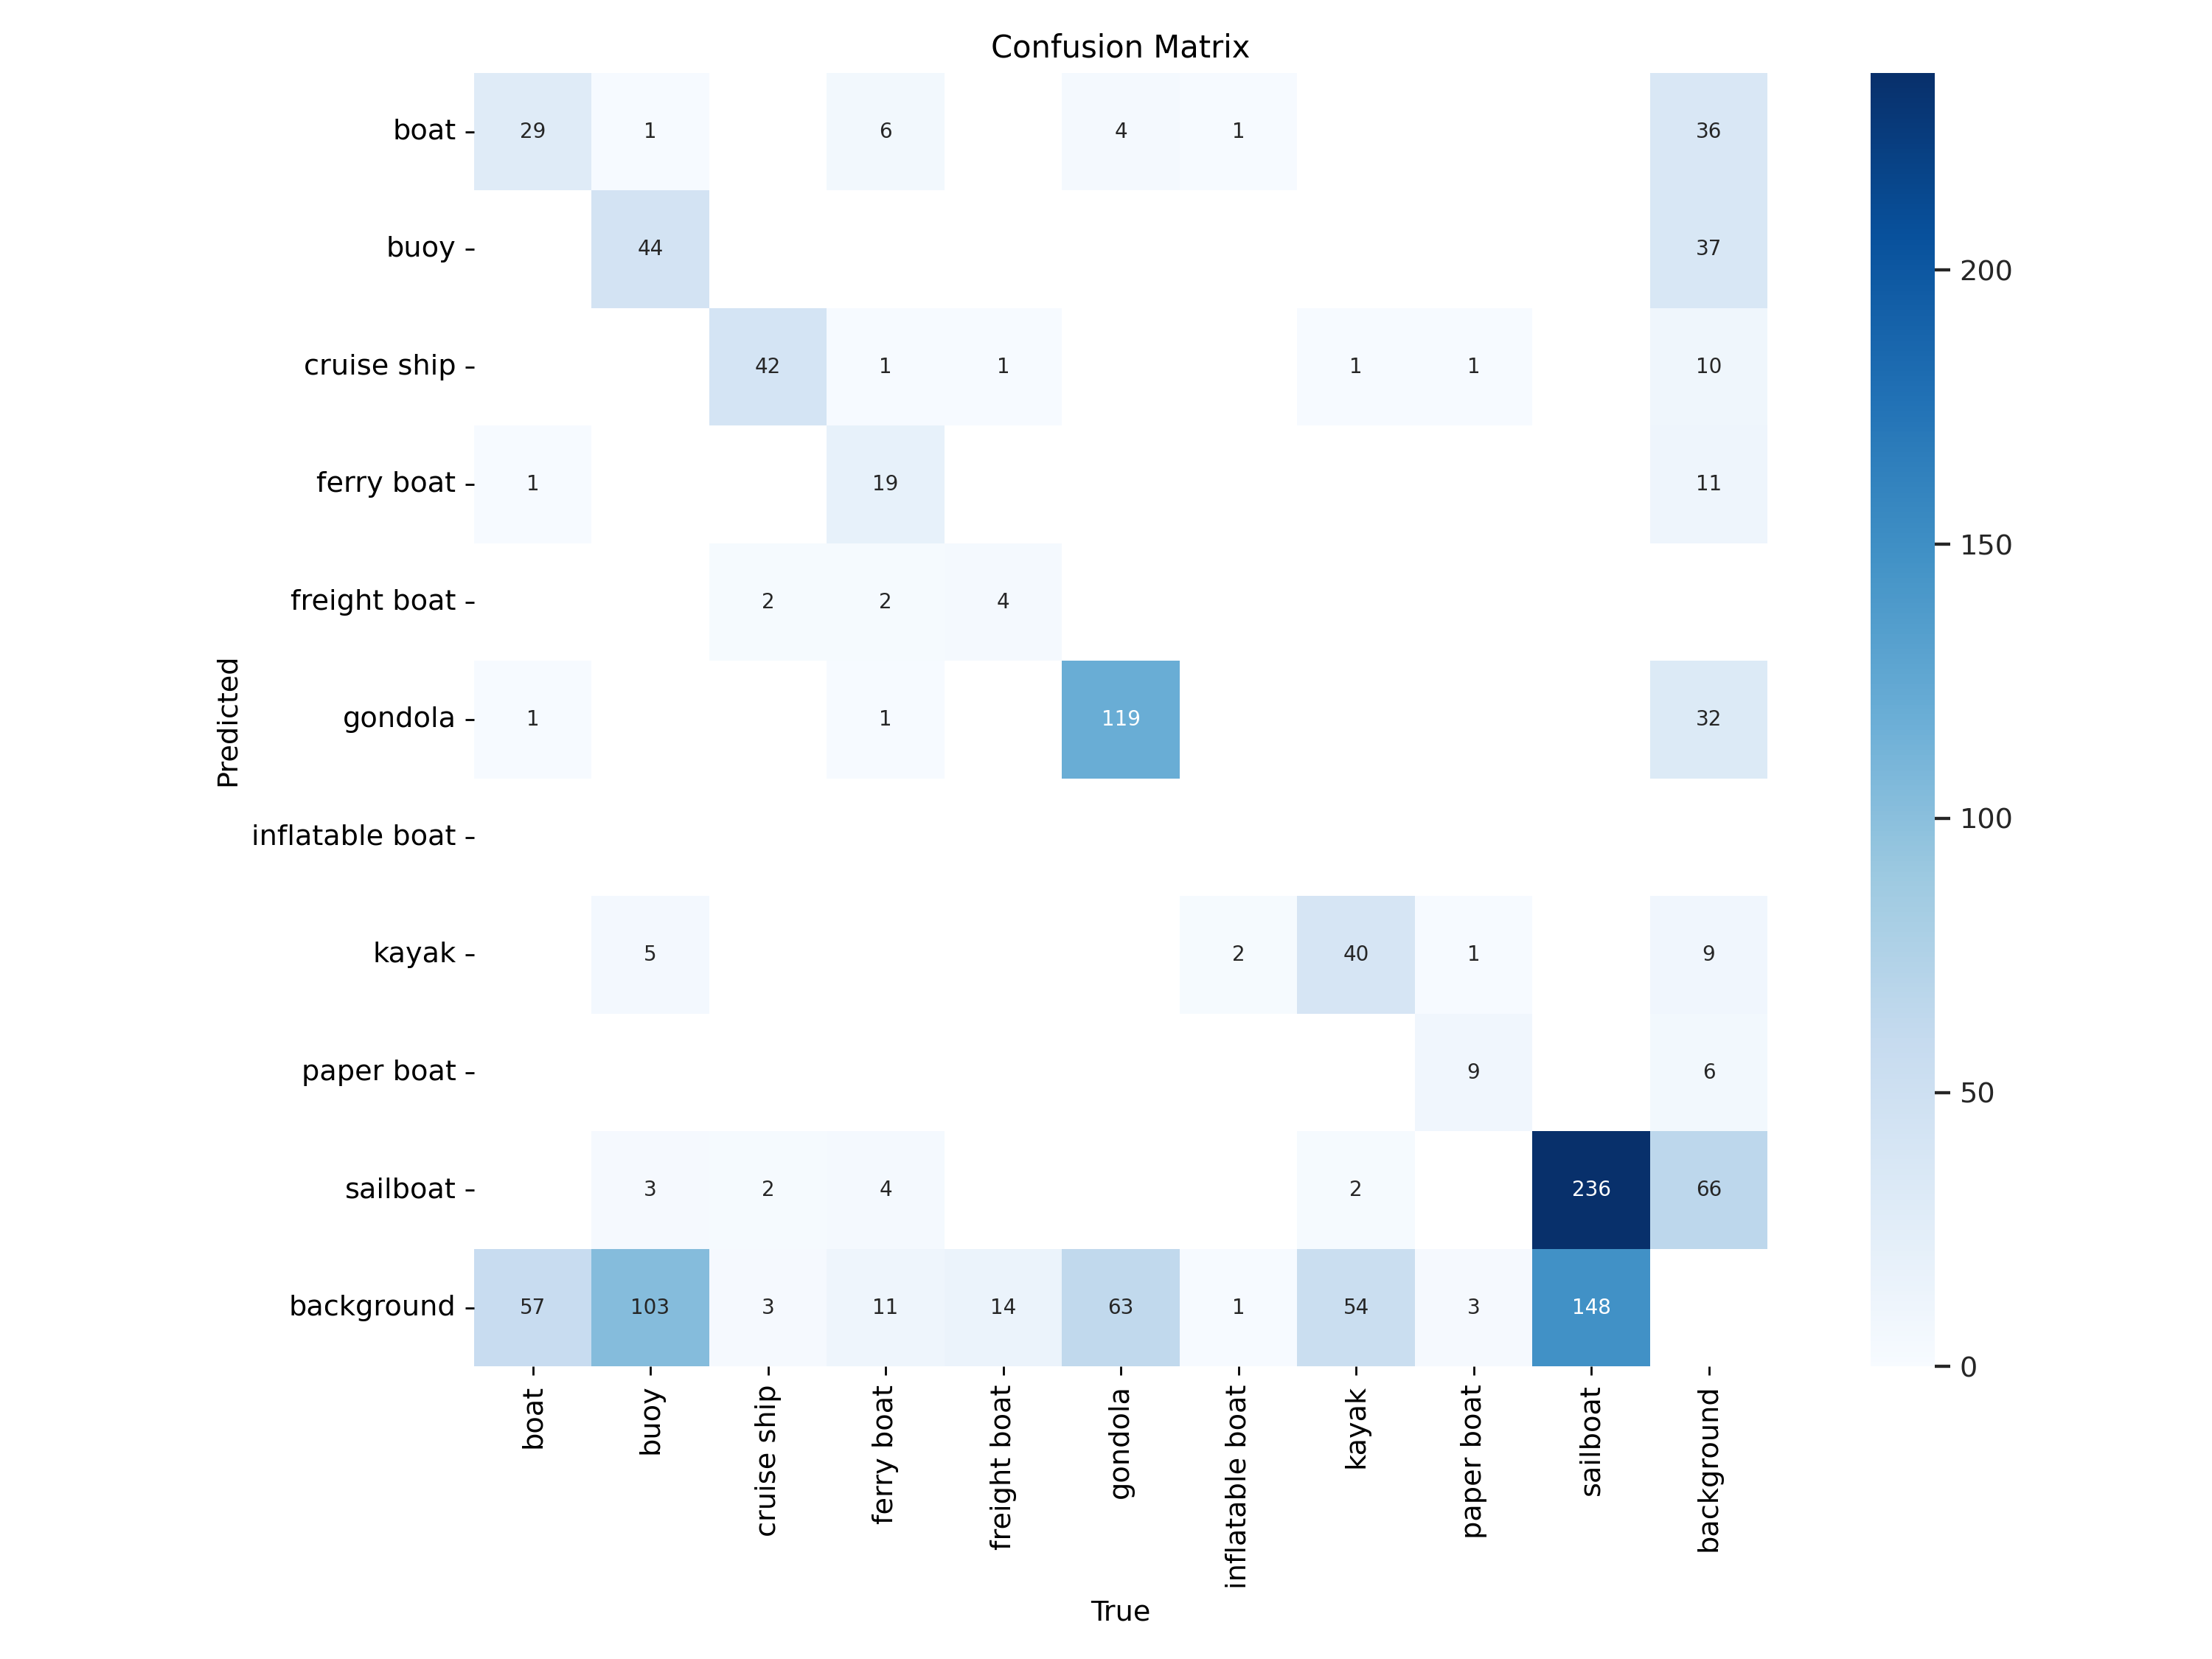

In [14]:
# yolov10-m
Image(filename=f'{HOME}/runs/detect/{run_name}/confusion_matrix.png', width=600)

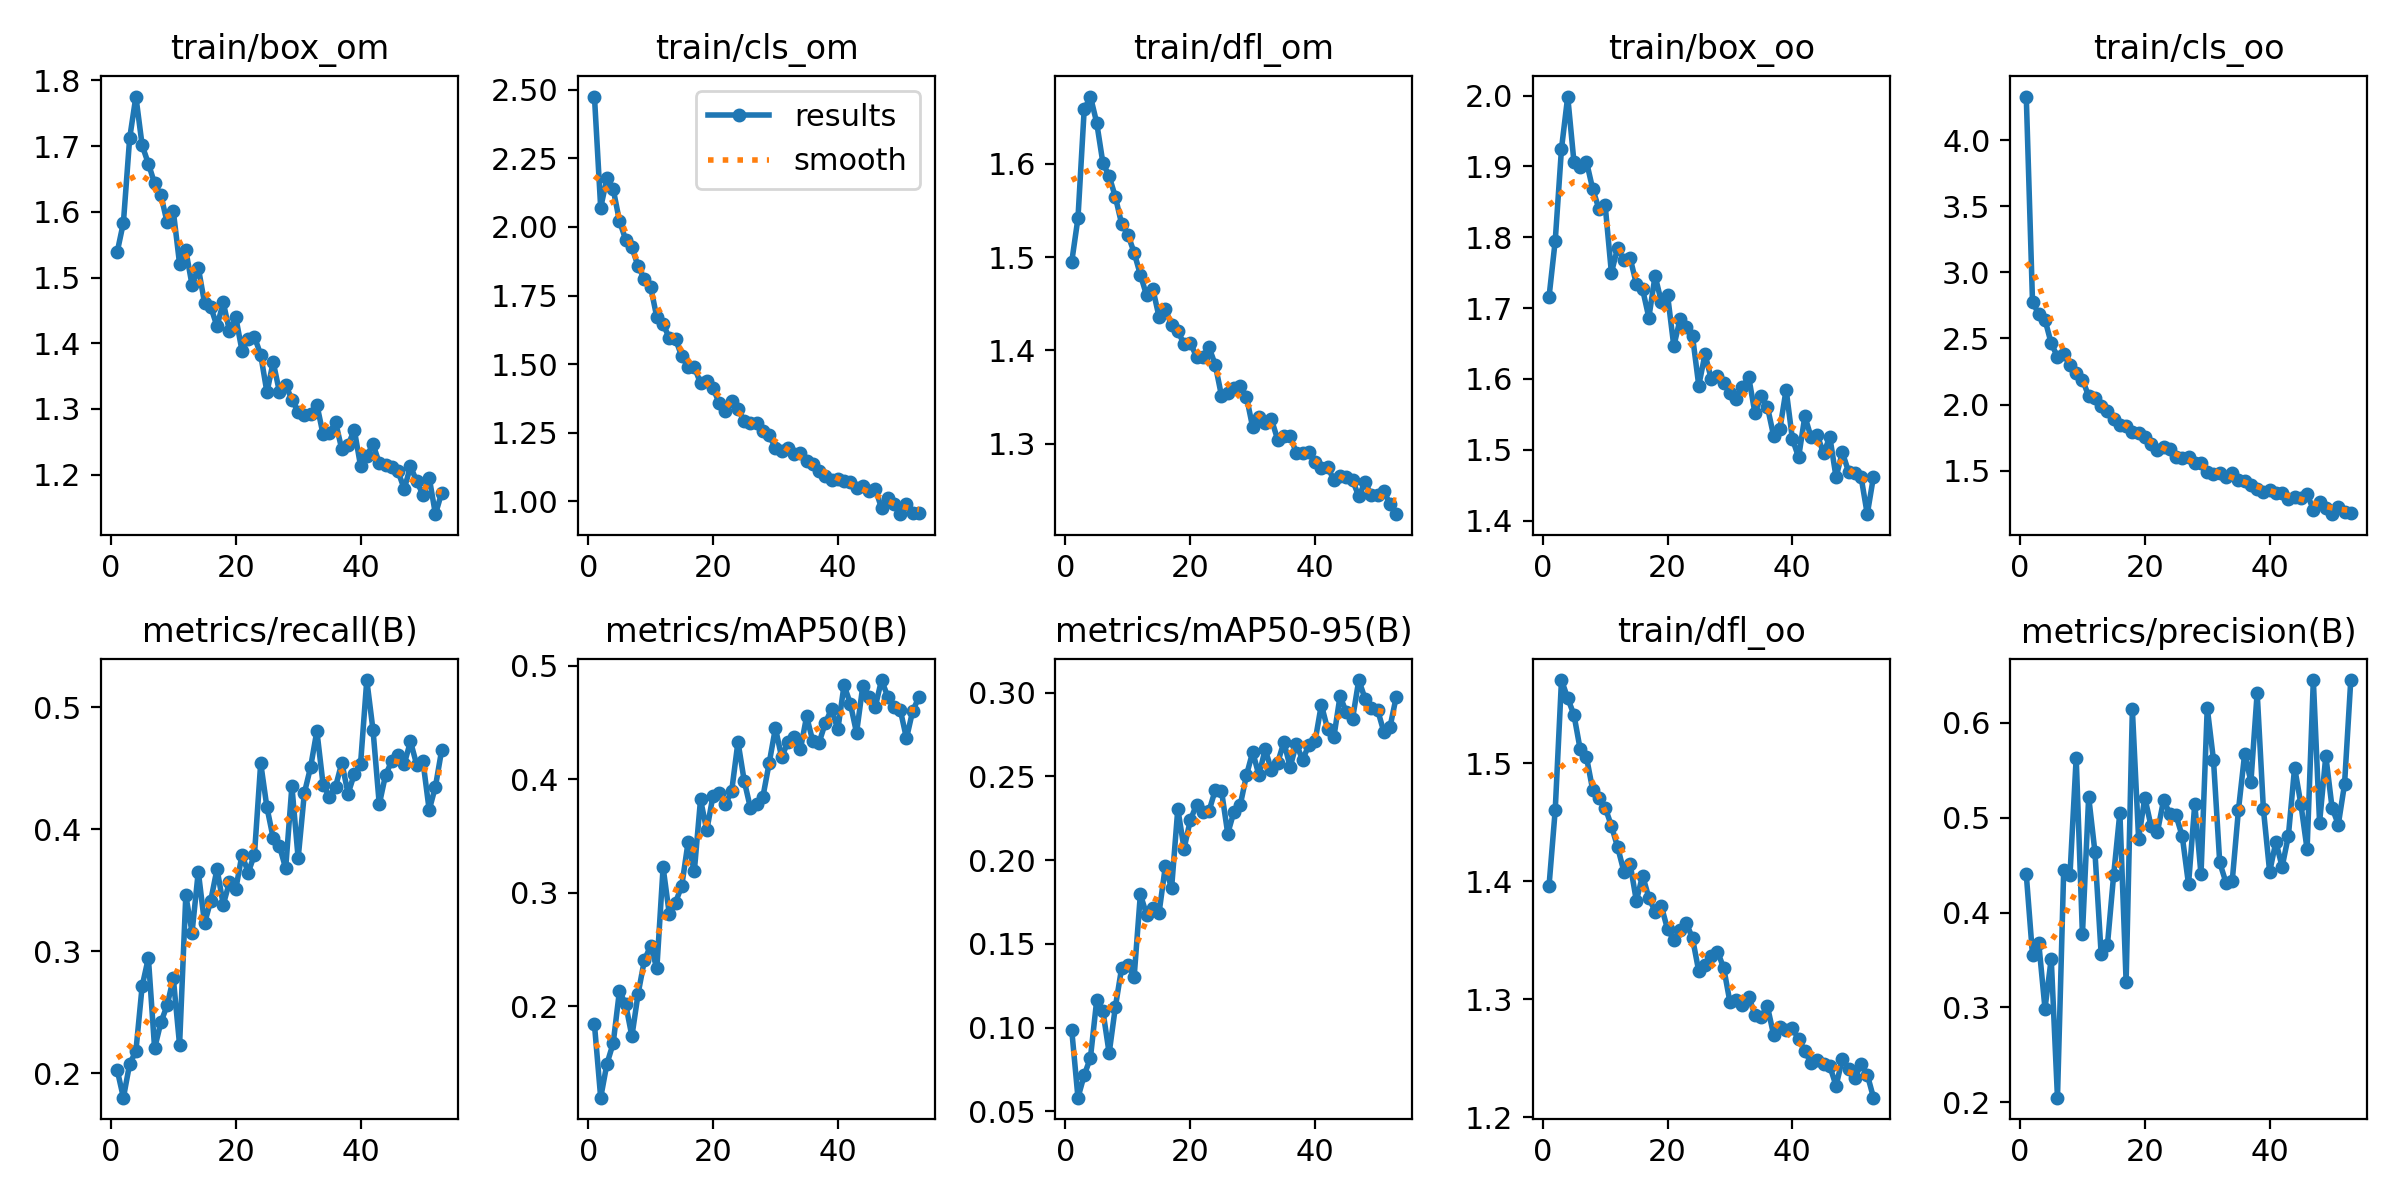

In [15]:
Image(filename=f'{HOME}/runs/detect/{run_name}/results.png', width=600)